# 数据准备工作

## 加载必要包

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 导入数据

In [2]:
mnist_train = pd.read_csv('data/mnist_train.csv', low_memory = False)
mnist_test = pd.read_csv('data/mnist_test.csv', low_memory = False)
mnist_train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
print(mnist_train.shape)
print(mnist_test.shape)

(60000, 785)
(10000, 785)


## 数据探索

### 数据示例

In [4]:
X_train = mnist_train.drop(columns = 'label', axis = 1)
y_train = mnist_train['label']

5


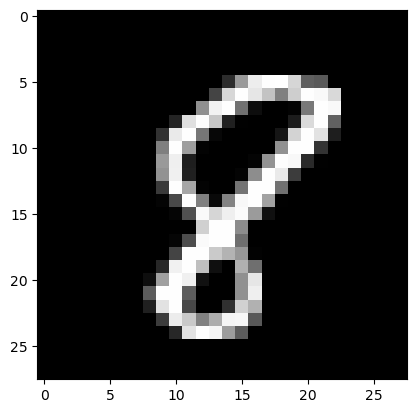

In [8]:
# 随机选择一张图片
single_image= X_train.to_numpy()[59962].reshape(28, 28)
plt.imshow(single_image, cmap='gray')
print(y_train[0]) # 可见，图下展示的数字5的图像

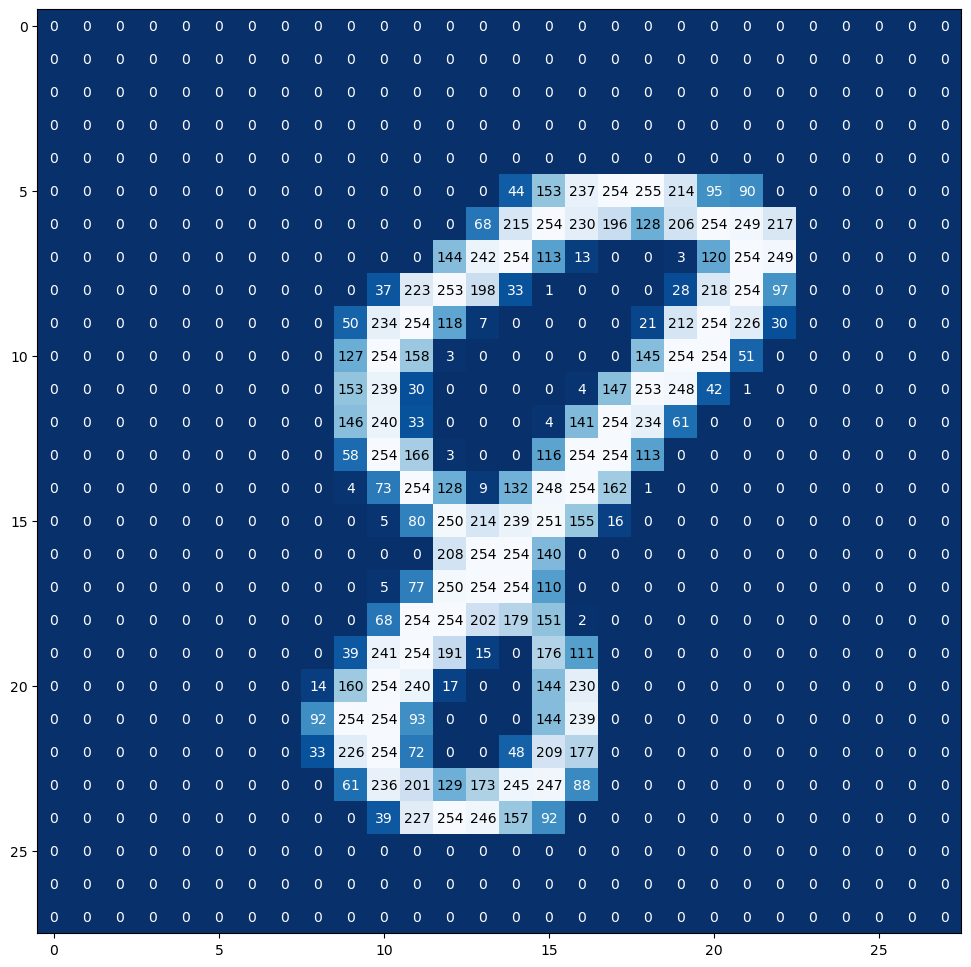

In [9]:
img = X_train.to_numpy()[59962].reshape(28, 28)

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
ax.imshow(img, cmap='Blues_r')
width, height = img.shape
thresh = img.max()/2.5
for x in range(width):
    for y in range(height):
        val = round(img[x][y],2) if img[x][y] !=0 else 0
        ax.annotate(str(val), xy=(y,x),
                    horizontalalignment='center',
                    verticalalignment='center',
                    color='white' if img[x][y]<thresh else 'black')
plt.savefig('picture/mnist_example5.png', dpi=300, bbox_inches='tight')


## 二维分布

In [ ]:
# 导入必要的库
from sklearn import manifold

# 创建t-SNE模型，设置为2维输出和固定随机种子以确保结果可复现
tsne=  manifold.TSNE(n_components=2, random_state=42, n_jobs=-1)

# 应用t-SNE降维
transformed_data_array= tsne.fit_transform(X_train.to_numpy())

# 获取对应的标签数据
target=mnist_train.label
target_array= target.to_numpy()

# 将降维后的数据和标签组合成DataFrame
# np.column_stack将二维坐标和标签合并为一个数组
tsne_df= pd.DataFrame(np.column_stack((transformed_data_array, target_array)), 
                     columns=["x","y","label"])

# 确保标签列为整数类型
tsne_df.loc[:,"label"] = tsne_df.label.astype(int)

### 排除异常点

In [ ]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

# 计算每个点到其k个最近邻的平均距离
X = tsne_df[['x', 'y']].values
k = 10  # 考虑的邻居数量
nn = NearestNeighbors(n_neighbors=k)
nn.fit(X)
distances, _ = nn.kneighbors(X)
avg_distances = distances[:, 1:].mean(axis=1)  # 排除自身距离

# 设置距离阈值（可以根据分布调整）
threshold = np.percentile(avg_distances, 95)  # 保留95%的点
keep_mask = avg_distances <= threshold

# 过滤数据
filtered_tsne_df = tsne_df[keep_mask]

print(f"原始数据大小: {tsne_df.shape}")
print(f"剔除离群点后的数据大小: {filtered_tsne_df.shape}")

In [ ]:
import seaborn as sns 
grid = sns.FacetGrid(filtered_tsne_df, hue="label", height=8)
grid.map(plt.scatter,"x","y").add_legend()
grid.fig.suptitle("t-SNE visualization of MNIST dataset", fontsize=16)
plt.show()
plt.savefig('picture/tsne_mnist.png', dpi=300, bbox_inches='tight')

In [ ]:
# 保存 tsne_df 数据到 pickle 文件
with open('tsne_data.pkl', 'wb') as f:
    pickle.dump(tsne_df, f)
print("数据已保存")